# pyROMS post-processing tools

This demo presents some plotting utilities in pyROMS.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib as mpl
from cmocean import cm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import pyroms
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

cmap = ListedColormap(['r', 'silver', 'b'])
mpl.rcParams['figure.figsize'] = (16,12)

### Load ROMS grid and avg data

In [2]:
grd_file = '/home/chuning/projects/ras/ras_grd_smooth.nc'
data_file = '/home/chuning/projects/ras/archive/outputs_tracer/roms_avg_0011.nc'

grd = pyroms.grid.get_ROMS_grid(grd_file)
ds0 = xr.open_dataset(data_file)
ds0 = ds0.isel(ocean_time=[-2, -1])
ds = pyroms.xr.RDataset(ds0, grd)

Load geographical grid from file
Constructing Vertical Grid.
A. Shchepetkin (2010) UCLA-ROMS vertical coordinate transformation (Vtransform=2) and stretching (Vstretching=4) functions.


### Plot data on Eta/Xi transects

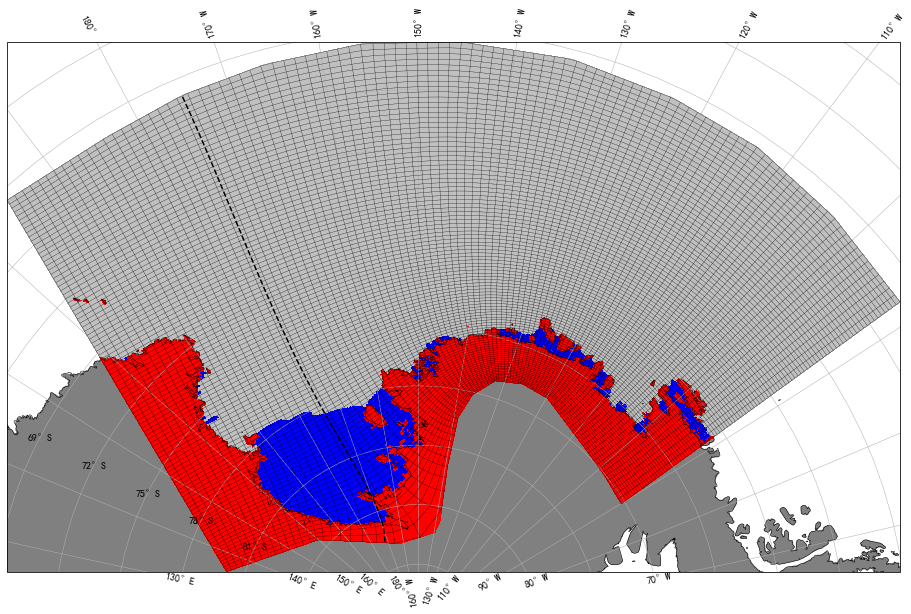

In [3]:
xi0 = 102

lon0, lat0 = 210., -75.
mproj = ccrs.Stereographic(
    central_latitude=lat0, central_longitude=lon0,
    false_easting=0.0, false_northing=0.0)

mask = ds.mask_rho
mask = mask.where((ds.mask_is==0) | (ds.mask_rho==0), 2)
fig, ax = plt.subplots(subplot_kw={'projection': mproj})
ax.gridlines(xlocs=range(-180, 180, 10), ylocs=range(-90, 90, 3),
             linewidth=0.5, draw_labels=True)
ax.coastlines(resolution='10m', linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor='gray')
ax.pcolormesh(grd.hgrid.x_vert, grd.hgrid.y_vert, mask, cmap=cmap)
ax.plot(ds.x_rho[:, xi0], ds.y_rho[:, xi0], '--k')
lines = ax.plot(ds.x_vert[::5, ::5], ds.y_vert[::5, ::5], 'k', lw=0.3)
lines = ax.plot(ds.x_vert[::5, ::5].T, ds.y_vert[::5, ::5].T, 'k', lw=0.3)

### Transect Plot in Eta/Xi-Z Coordinates

Text(0.5, 1.0, 'pyROMS')

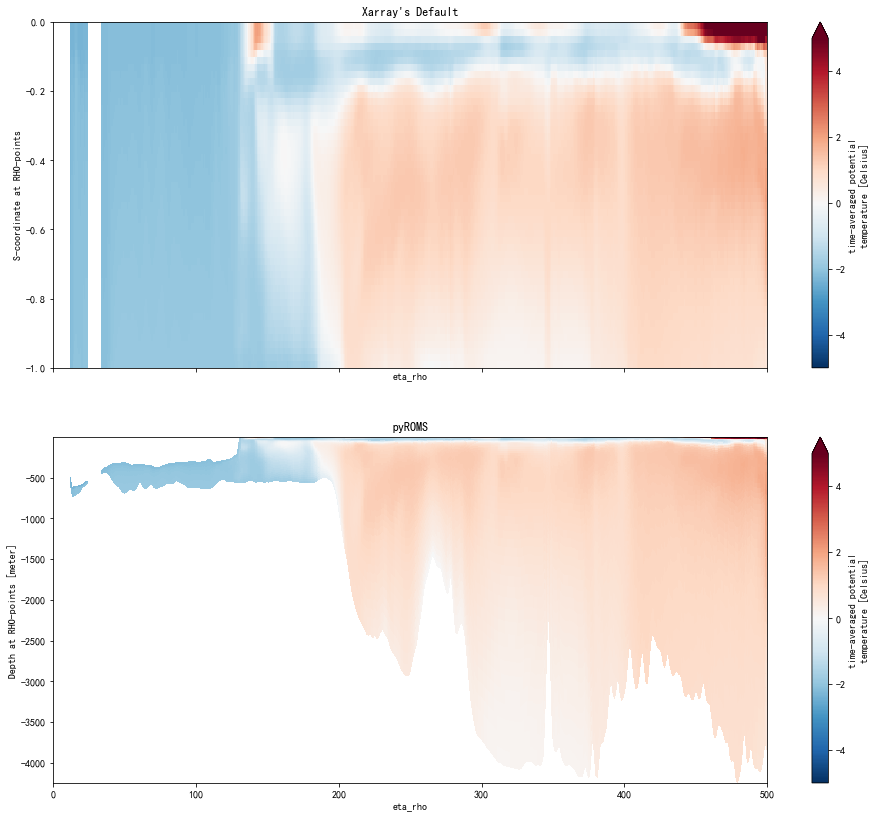

In [4]:
fig, ax = plt.subplots(2, 1, figsize=[16,14], sharex=True)
ds.temp[-1, :, :, xi0].plot(ax=ax[0], vmin=-5, vmax=5, cmap='RdBu_r')
ds.temp[-1, :, :, xi0].roms.plot(ax=ax[1], vmin=-5, vmax=5)
ax[0].set_title("Xarray's Default")
ax[1].set_title("pyROMS")

### Change x-axis coordinates with **geo=True/False**

Text(0.5, 1.0, 'In x/y')

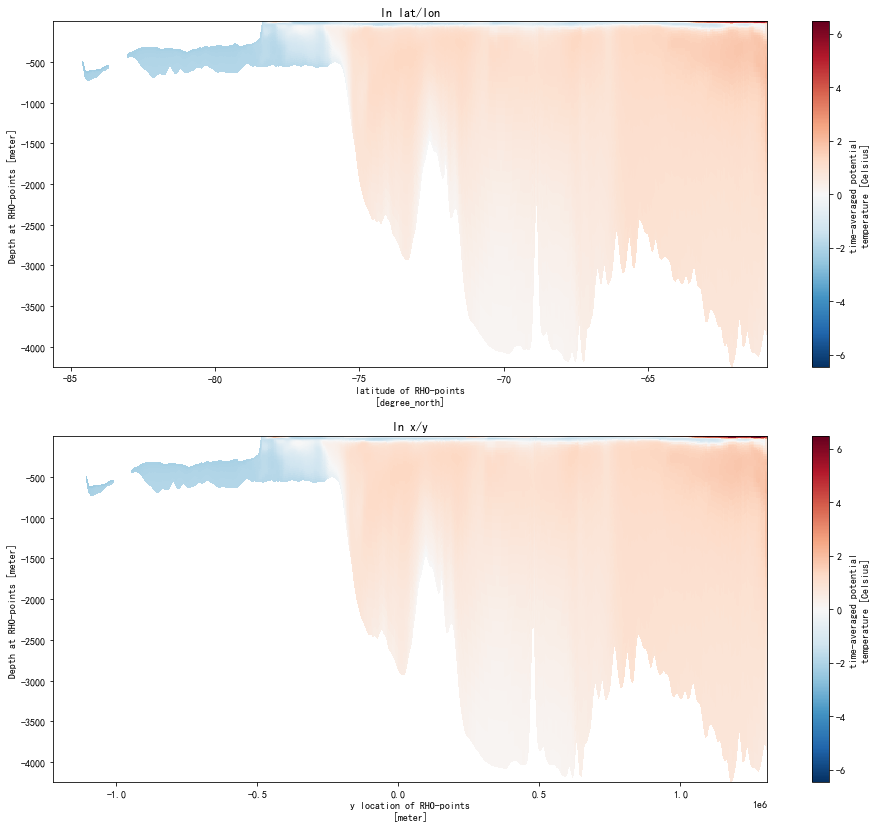

In [5]:
fig, ax = plt.subplots(2, 1, figsize=[16,14])
ds.temp[-1, :, :, xi0].roms.plot(ax=ax[0],geo=True)
ds.temp[-1, :, :, xi0].roms.plot(ax=ax[1],geo=False)
ax[0].set_title("In lat/lon")
ax[1].set_title("In x/y")

### Plot data on arbitary transects

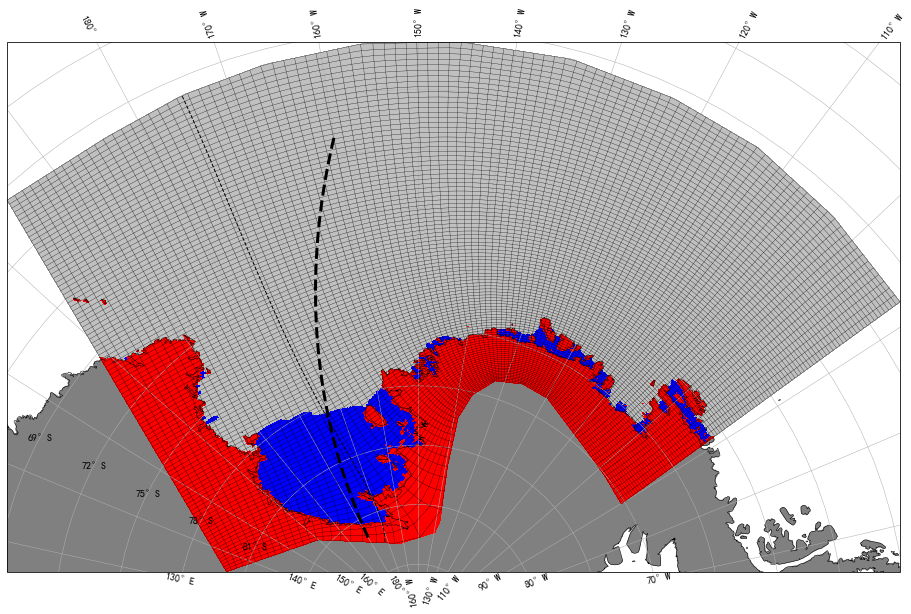

In [6]:
lat = np.linspace(-85, -65, 101)
lon = 180*np.ones(len(lat)) + np.linspace(0, 20, len(lat))
x, y = grd.hgrid.proj(lon, lat)

mask = ds.mask_rho
mask = mask.where((ds.mask_is==0) | (ds.mask_rho==0), 2)
fig, ax = plt.subplots(subplot_kw={'projection': mproj})
ax.gridlines(xlocs=range(-180, 180, 10), ylocs=range(-90, 90, 3),
             linewidth=0.5, draw_labels=True)
ax.coastlines(resolution='10m', linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor='gray')
ax.pcolormesh(grd.hgrid.x_vert, grd.hgrid.y_vert, mask, cmap=cmap)
ax.plot(x, y, '--k', lw=3)
ax.plot(ds.x_rho[:, xi0], ds.y_rho[:, xi0], '--k', lw=1)
lines = ax.plot(ds.x_vert[::5, ::5], ds.y_vert[::5, ::5], 'k', lw=0.3)
lines = ax.plot(ds.x_vert[::5, ::5].T, ds.y_vert[::5, ::5].T, 'k', lw=0.3)

### Interpolate gridded data to transect

In [7]:
ds_interp = ds.roms.interp(lon, lat)
print(ds_interp)

<xarray.RDataset>
Dimensions:      (boundary: 4, tracer: 3, s_rho: 50, s_w: 51, track: 101, ocean_time: 2, xi_vert: 501, eta_vert: 501)
Coordinates: (12/76)
    FSobc_in     (boundary) float64 0.0 0.0 0.0 0.0
    FSobc_out    (boundary) float64 0.0 0.0 0.0 0.0
    M2obc_in     (boundary) float64 0.0 0.0 0.0 0.0
    M2obc_out    (boundary) float64 0.0 0.0 0.0 0.0
    Tobc_in      (boundary, tracer) float64 3.858e-06 3.858e-06 ... 0.0
    Tobc_out     (boundary, tracer) float64 3.215e-08 3.215e-08 ... 0.0
    ...           ...
    xi_psi       (track) float64 97.11 96.54 96.03 95.58 ... 163.7 164.6 165.6
    eta_u        (track) float64 3.193 5.83 8.578 11.46 ... 415.2 419.0 422.8
    xi_u         (track) float64 97.11 96.54 96.03 95.58 ... 163.7 164.6 165.6
    eta_v        (track) float64 3.193 5.83 8.578 11.46 ... 415.2 419.0 422.8
    xi_v         (track) float64 97.11 96.54 96.03 95.58 ... 163.7 164.6 165.6
    distance     (track) float64 0.0 2.264e+04 4.527e+04 ... 2.3e+06 2.325e+

### Plot transect

Text(0.5, 1.0, 'Subglacial Melt Water')

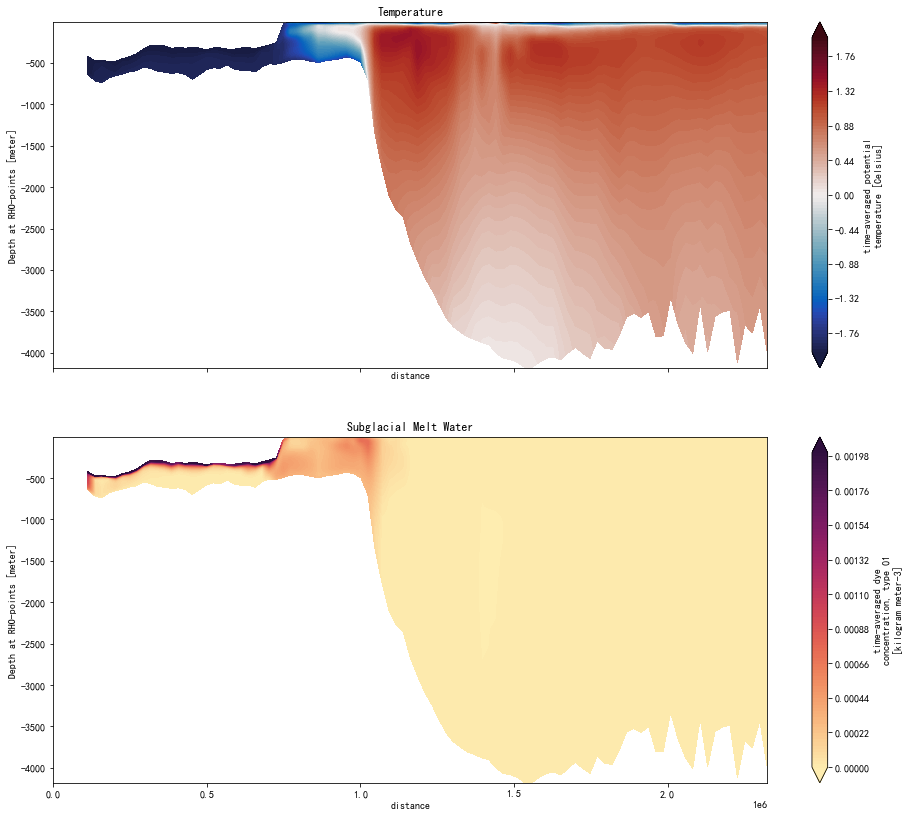

In [8]:
fig, ax = plt.subplots(2, 1, figsize=[16,14], sharex=True, sharey=True)
ds_interp.temp[-1].roms.plot.contourf(ax=ax[0], levels=np.linspace(-2, 2, 101), cmap=cm.balance)
ds_interp.dye_01[-1].roms.plot.contourf(ax=ax[1], levels=np.linspace(0, 0.002, 101), cmap=cm.matter)
ax[0].set_title('Temperature')
ax[1].set_title('Subglacial Melt Water')
# plt.gca().set_ylim(-1000, 0)

### Interactive transect selector

In [4]:
%matplotlib qt
selector = pyroms.hgrid.GetPositionFromMap(grd, iceshelf=True)
selector()

    e: toggle between Editing/Viewing mode
    N: end editing
Coords:   xi,  eta,           x,           y,       lon,       lat
      +   31   248   -1605678.6    -657162.1    164.575    -72.521
      +  103   199    -916568.7    -454482.7   -174.766    -75.434
      +  159   104    -286010.6    -486010.6   -152.588    -77.902
      +  148   125    -403114.3    -477002.6   -157.271    -77.567
      +  132   151    -574265.8    -477002.6   -163.826    -77.053
      +  119   170    -718393.3    -477002.6   -168.911    -76.504
      +   86   210   -1069704.3    -499522.6    179.995    -74.961
      +   69   222   -1240855.7    -549066.4    174.582    -74.298
      +   53   231   -1389487.3    -603114.2    170.012    -73.690
      >   39   242   -1524606.9    -634642.1    166.579    -72.963
      >   77   215   -1155280.0    -531050.5    177.081    -74.691
      >   89   207   -1042680.3    -495018.6   -179.178    -75.078
      +   78   211   -1137264.1    -540058.4    177.340    -74.856


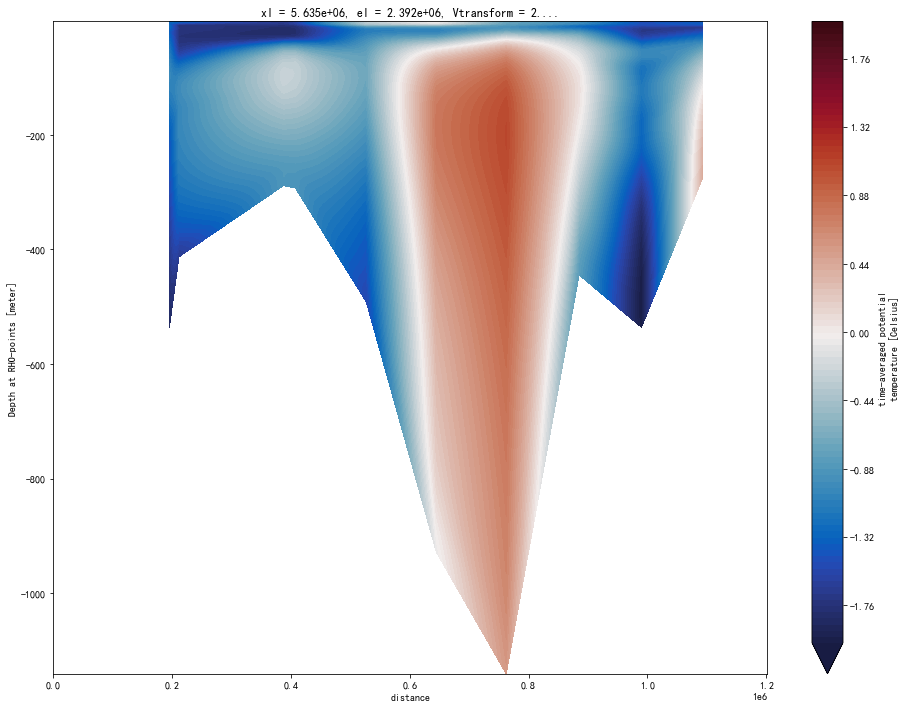

In [5]:
%matplotlib inline
ds_interp = ds.roms.interp(selector.lon, selector.lat)
ds_interp.temp[-1].roms.plot.contourf(figsize=[16, 12], levels=np.linspace(-2, 2, 101), cmap=cm.balance)